In [1]:
import numpy as np
import h5py

f = h5py.File("/oak/stanford/groups/akundaje/avsec/basepair/data/"
              +"processed/comparison/output/nexus,peaks,OSNK,0,10"
              +",1,FALSE,same,0.5,64,25,0.004,9,FALSE,[1,50],TRUE"
              +",FALSE,1/deeplift.imp_score.h5", "r")
#f = h5py.File("/users/avanti/deeplift.imp_score.h5","r")
nanog_mask = np.array(f['metadata']['interval_from_task'][:]=='Nanog')
nanog_profile_wn_hypimp = np.array(f["hyp_imp/Nanog/profile/wn"][:])[nanog_mask]
onehot_seq = np.array(f["inputs/seq"][:])[nanog_mask]
nanog_profile_wn_contribs = nanog_profile_wn_hypimp*onehot_seq

In [2]:
import modisco
track_set = modisco.tfmodisco_workflow.workflow.prep_track_set(
    task_names=["Nanog_profile_wn"],
    contrib_scores={'Nanog_profile_wn': nanog_profile_wn_contribs},
    hypothetical_contribs={'Nanog_profile_wn': nanog_profile_wn_hypimp},
    one_hot=onehot_seq)
grp = h5py.File("/oak/stanford/groups/akundaje/avsec/basepair/data/processed/comparison/output/nexus"
                +",peaks,OSNK,0,10,1,FALSE,same,0.5,64,25,0.004,9,FALSE,[1,50],TRUE,FALSE,1/deeplift"
                +"/Nanog/out/profile/wn/modisco.h5","r")
loaded_tfmodisco_results =\
    modisco.tfmodisco_workflow.workflow.TfModiscoResults.from_hdf5(grp, track_set=track_set)
grp.close()
patterns = (loaded_tfmodisco_results
            .metacluster_idx_to_submetacluster_results["metacluster_0"]
            .seqlets_to_patterns_result.patterns)

TF-MoDISco is using the TensorFlow backend.
/users/avanti/anaconda3/envs/py376/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/users/avanti/anaconda3/envs/py376/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/users/avanti/anaconda3/envs/py376/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/u

In [3]:
len(loaded_tfmodisco_results.multitask_seqlet_creation_results.final_seqlets)

98300

In [4]:
nanog_profile_wn_contribs.shape

(55233, 1000, 4)

In [5]:
#Saving the seqlets

"""extracted_contrib_scores = []
extracted_hypothetical_scores = []
extracted_onehot_seqs = []
seqlets_list = loaded_tfmodisco_results.multitask_seqlet_creation_results.final_seqlets

window_around = 50

#extract +/- 50bp around each seqlet
for seqlet in seqlets_list:
    example_idx = seqlet.coor.example_idx
    start = seqlet.coor.start
    end = seqlet.coor.end
    if ((start>=window_around) and (end<=1000-window_around)):
        extracted_contrib_scores.append(
            nanog_profile_wn_contribs[example_idx,start-window_around:end+window_around])
        extracted_hypothetical_scores.append(
            nanog_profile_wn_hypimp[example_idx,start-window_around:end+window_around])
        extracted_onehot_seqs.append(
            onehot_seq[example_idx,start-window_around:end+window_around])

np.save("extracted_contrib_scores.npy", np.array(extracted_contrib_scores))
np.save("extracted_hypothetical_scores.npy", np.array(extracted_hypothetical_scores))
np.save("extracted_onehot.npy", np.array(extracted_onehot_seqs))"""

'extracted_contrib_scores = []\nextracted_hypothetical_scores = []\nextracted_onehot_seqs = []\nseqlets_list = loaded_tfmodisco_results.multitask_seqlet_creation_results.final_seqlets\n\nwindow_around = 50\n\n#extract +/- 50bp around each seqlet\nfor seqlet in seqlets_list:\n    example_idx = seqlet.coor.example_idx\n    start = seqlet.coor.start\n    end = seqlet.coor.end\n    if ((start>=window_around) and (end<=1000-window_around)):\n        extracted_contrib_scores.append(\n            nanog_profile_wn_contribs[example_idx,start-window_around:end+window_around])\n        extracted_hypothetical_scores.append(\n            nanog_profile_wn_hypimp[example_idx,start-window_around:end+window_around])\n        extracted_onehot_seqs.append(\n            onehot_seq[example_idx,start-window_around:end+window_around])\n\nnp.save("extracted_contrib_scores.npy", np.array(extracted_contrib_scores))\nnp.save("extracted_hypothetical_scores.npy", np.array(extracted_hypothetical_scores))\nnp.save("

In [6]:
!ls

copy_data.py			   runme.sh
extracted_contrib_scores.npy	   sparserun_l6g2m0_results.hdf5
extracted_hypothetical_scores.npy  sparserun_results.hdf5
extracted_onehot.npy		   trial1.deeplift.imp_score.h5
myrun_results.hdf5		   trial1.modisco.h5
presparserun_l8g3m2_results.hdf5   TryBpNet.ipynb
presparserun_results.hdf5


In [7]:
#for i in range(10):
#    seqlets_list = loaded_tfmodisco_results.multitask_seqlet_creation_results.final_seqlets
#    modisco.visualization.viz_sequence.plot_weights(seqlets_list[i]["Nanog_profile_wn_contrib_scores"].fwd)

In [8]:
"""#visualize the patterns:
%matplotlib inline
from modisco.visualization import viz_sequence
for idx,pattern in enumerate(patterns):
    print("pattern idx",idx)
    print(len(pattern.seqlets))
    viz_sequence.plot_weights(
        pattern["Nanog_profile_wn_contrib_scores"].fwd)
    viz_sequence.plot_weights(pattern["sequence"].fwd)"""

'#visualize the patterns:\n%matplotlib inline\nfrom modisco.visualization import viz_sequence\nfor idx,pattern in enumerate(patterns):\n    print("pattern idx",idx)\n    print(len(pattern.seqlets))\n    viz_sequence.plot_weights(\n        pattern["Nanog_profile_wn_contrib_scores"].fwd)\n    viz_sequence.plot_weights(pattern["sequence"].fwd)'

/mnt/lab_data2/avanti/tfmodisco
commit b86c5aeaec232eb7368913ba6d9f099a82114532 (HEAD -> cluster_init, origin/cluster_init)
Author: Av Shrikumar <avanti.shrikumar@gmail.com>
Date:   Wed Apr 15 06:12:35 2020 -0700

    gkmexplain Nanog results with MEME-DISco 10 init
/mnt/lab_data2/avanti/tfmodisco_bio_experiments
MEMORY 4.398743552
On task Nanog_profile_wn
Computing windowed sums on original
Generating null dist
peak(mu)= 0.00754788601747714
Computing threshold
Thresholds from null dist were -0.026598811149597168  and  0.2509317398071289
Passing windows frac was 0.04676685078463518 , which is above  0.03 ; adjusting
Final raw thresholds are -0.3184376752376554  and  0.3184376752376554
Final transformed thresholds are -0.9699999852203116  and  0.9699999852203116


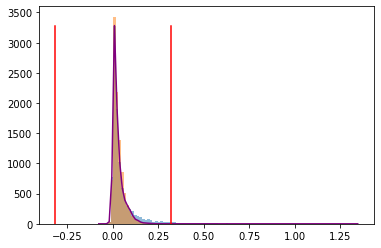

Got 98300 coords
After resolving overlaps, got 98300 seqlets
Across all tasks, the weakest transformed threshold used was: 0.9698999852203116
MEMORY 6.318641152
98300 identified in total
1 activity patterns with support >= 2000 out of 3 possible patterns
Metacluster sizes:  [98297]
Idx to activities:  {0: '1'}
MEMORY 6.319501312
On metacluster 0
Metacluster size 98297 limited to 50000
Relevant tasks:  ('Nanog_profile_wn',)
Relevant signs:  (1,)

TfModiscoSeqletsToPatternsFactory: seed=1234
(Round 1) num seqlets: 50000
(Round 1) Computing coarse affmat
MEMORY 6.321340416
Beginning embedding computation
Computing embeddings
MAKING A SESSION


Finished embedding computation in 24.0 s
Starting affinity matrix computations
Normalization computed in 3.07 s
Cosine similarity mat computed in 195.79 s
Normalization computed in 3.02 s
Cosine similarity mat computed in 195.77 s
Finished affinity matrix computations in 410.39 s
(Round 1) Compute nearest neighbors from coarse affmat
MEMORY 17.19938

  0%|          | 0/50 [00:00<?, ?it/s]

Quality: 0.40587358634783754


  2%|▏         | 1/50 [00:12<10:16, 12.59s/it]

Quality: 0.4071649825736516


 14%|█▍        | 7/50 [01:40<10:01, 13.98s/it]

Quality: 0.4072431747333008


 38%|███▊      | 19/50 [04:27<07:12, 13.96s/it]

Quality: 0.4073573755277268


 76%|███████▌  | 38/50 [09:09<03:25, 17.10s/it]

Quality: 0.40743475206984675


 82%|████████▏ | 41/50 [09:53<02:19, 15.53s/it]

Quality: 0.4077009514444476


100%|██████████| 50/50 [12:06<00:00, 14.53s/it]

Got 24 clusters after round 1
Counts:
{0: 2616, 2: 1638, 11: 628, 21: 204, 10: 678, 3: 1259, 8: 721, 6: 909, 5: 966, 14: 443, 1: 1720, 4: 1191, 9: 701, 17: 383, 13: 473, 7: 859, 20: 233, 19: 338, 18: 350, 15: 430, 12: 544, 16: 387, 22: 47, 23: 9}
MEMORY 8.448417792
(Round 1) Aggregating seqlets in each cluster
MEMORY 8.448417792
Aggregating for cluster 0 with 2616 seqlets
MEMORY 8.448417792


Trimmed 278 out of 2616
Aggregating for cluster 1 with 1720 seqlets
MEMORY 8.461873152
Trimmed 93 out of 1720
Skipped 1 seqlets
Removed 4 duplicate seqlets
Aggregating for cluster 2 with 1638 seqlets
MEMORY 8.463142912
Trimmed 135 out of 1638
Aggregating for cluster 3 with 1259 seqlets
MEMORY 8.466599936
Trimmed 136 out of 1259
Aggregating for cluster 4 with 1191 seqlets
MEMORY 8.467644416
Trimmed 130 out of 1191
Skipped 1 seqlets
Aggregating for cluster 5 with 966 seqlets
MEMORY 8.470114304
Trimmed 95 out of 966
Aggregating for cluster 6 with 909 seqlets
MEMORY 8.471318528
Trimmed 106 out of 909
Aggregating for cluster 7 with 859 seqlets
MEMORY 8.47316992
Trimmed 40 out of 859
Skipped 2 seqlets
Removed 2 duplicate seqlets
Aggregating for cluster 8 with 721 seqlets
MEMORY 8.475287552
Trimmed 84 out of 721
Aggregating for cluster 9 with 701 seqlets
MEMORY 8.476106752
Trimmed 36 out of 701
Aggregating for cluster 10 with 678 seqlets
MEMORY 8.477364224
Trimmed 59 out of 678
Aggregating fo

  0%|          | 0/50 [00:00<?, ?it/s]

Quality: 0.4894956212992016


  2%|▏         | 1/50 [00:13<10:45, 13.17s/it]

Quality: 0.489652458335529


  8%|▊         | 4/50 [01:02<11:43, 15.30s/it]

Quality: 0.4897575864152215


100%|██████████| 50/50 [12:17<00:00, 14.76s/it]

Got 19 clusters after round 2
Counts:
{7: 1071, 4: 1441, 6: 1105, 0: 3715, 2: 1613, 11: 334, 8: 898, 1: 1717, 15: 50, 5: 1298, 12: 217, 9: 486, 10: 371, 13: 212, 3: 1503, 14: 111, 17: 3, 16: 5, 18: 3}
MEMORY 7.763718144
(Round 2) Aggregating seqlets in each cluster
MEMORY 7.763718144
Aggregating for cluster 0 with 3715 seqlets
MEMORY 7.763718144


Trimmed 56 out of 3715
Skipped 1 seqlets
Removed 65 duplicate seqlets
Aggregating for cluster 1 with 1717 seqlets
MEMORY 7.785213952
Trimmed 158 out of 1717
Removed 10 duplicate seqlets
Aggregating for cluster 2 with 1613 seqlets
MEMORY 7.784968192
Trimmed 79 out of 1613
Removed 20 duplicate seqlets
Aggregating for cluster 3 with 1503 seqlets
MEMORY 7.785218048
Trimmed 123 out of 1503
Removed 3 duplicate seqlets
Aggregating for cluster 4 with 1441 seqlets
MEMORY 7.78737664
Trimmed 243 out of 1441
Removed 4 duplicate seqlets
Aggregating for cluster 5 with 1298 seqlets
MEMORY 7.788634112
Trimmed 108 out of 1298
Aggregating for cluster 6 with 1105 seqlets
MEMORY 7.793119232
Trimmed 217 out of 1105
Removed 2 duplicate seqlets
Aggregating for cluster 7 with 1071 seqlets
MEMORY 7.793864704
Trimmed 108 out of 1071
Removed 1 duplicate seqlets
Aggregating for cluster 8 with 898 seqlets
MEMORY 7.795421184
Trimmed 123 out of 898
Removed 5 duplicate seqlets
Aggregating for cluster 9 with 486 seqle

After 1 runs, maximum modularity is Q = 0.00397152
After 2 runs, maximum modularity is Q = 0.00415956
After 11 runs, maximum modularity is Q = 0.0041599
After 15 runs, maximum modularity is Q = 0.00416481
Louvain completed 35 runs in 8.932656526565552 seconds
Similarity is 0.78437096; is_dissimilar is True
Inspecting for spurious merging
Wrote graph to binary file in 0.008265972137451172 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.00271215
After 2 runs, maximum modularity is Q = 0.00363104
After 3 runs, maximum modularity is Q = 0.0038561
After 5 runs, maximum modularity is Q = 0.00403593
Louvain completed 25 runs in 6.426116943359375 seconds
Similarity is 0.74825233; is_dissimilar is True
Got 3 subclusters
Inspecting for spurious merging
Wrote graph to binary file in 0.052216291427612305 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.0051171
After 2 runs, maximum modularity is Q = 0.00513668
Louva

In [9]:
#print modisco commit hash
%cd /users/avanti/tfmodisco
!git log -n 1
%cd /users/avanti/tfmodisco_bio_experiments

from importlib import reload

%matplotlib inline
import h5py
import numpy as np
import modisco
import modisco.cluster.phenograph.core
reload(modisco.cluster.phenograph.core)
import modisco.cluster.phenograph.cluster
reload(modisco.cluster.phenograph.cluster)
import modisco.cluster.phenograph
reload(modisco.cluster.phenograph)
import modisco.cluster.core
reload(modisco.cluster.core)
import modisco.cluster
reload(modisco.cluster)
import modisco.affinitymat.core
reload(modisco.affinitymat.core)
import modisco.affinitymat.transformers
reload(modisco.affinitymat.transformers)
import modisco.tfmodisco_workflow.seqlets_to_patterns
reload(modisco.tfmodisco_workflow.seqlets_to_patterns)
import modisco.tfmodisco_workflow.workflow
reload(modisco.tfmodisco_workflow.workflow)
import modisco.nearest_neighbors
reload(modisco.nearest_neighbors)
import modisco.affinitymat
reload(modisco.affinitymat)
import modisco.aggregator
reload(modisco.aggregator)
import modisco.value_provider
reload(modisco.value_provider)
import modisco.core
reload(modisco.core)
import modisco.coordproducers
reload(modisco.coordproducers)
import modisco.metaclusterers
reload(modisco.metaclusterers)

%matplotlib inline

workflow = modisco.tfmodisco_workflow.workflow.TfModiscoWorkflow(
    sliding_window_size=21,
    flank_size=10,
    target_seqlet_fdr=0.01,
    min_passing_windows_frac=0.03,
    max_passing_windows_frac=0.03,
    min_metacluster_size=2000,
    min_metacluster_size_frac=0.02,
    max_seqlets_per_metacluster=50000,
    seqlets_to_patterns_factory=
      modisco.tfmodisco_workflow.seqlets_to_patterns.TfModiscoSeqletsToPatternsFactory(
        trim_to_window_size=30,
        initial_flank_to_add=10,
        kmer_len=6,
        num_gaps=2,
        num_mismatches=0,
        n_cores=10,
        final_min_cluster_size=60
    )
)

results = workflow(
    task_names=["Nanog_profile_wn"],
    contrib_scores={'Nanog_profile_wn': nanog_profile_wn_contribs},
    hypothetical_contribs={'Nanog_profile_wn': nanog_profile_wn_hypimp},
    one_hot=onehot_seq)

In [13]:
import h5py
import modisco.util
reload(modisco.util)
import os

file_path = "commitb86c5a_l6g2m0_results.hdf5"
if (os.path.exists(file_path)):
    os.remove(file_path)
grp = h5py.File(file_path, "w")
results.save_hdf5(grp)
grp.close()

metacluster_0
activity pattern: [1]
metacluster_0 pattern_0
total seqlets: 3615
Task 0 hypothetical scores:


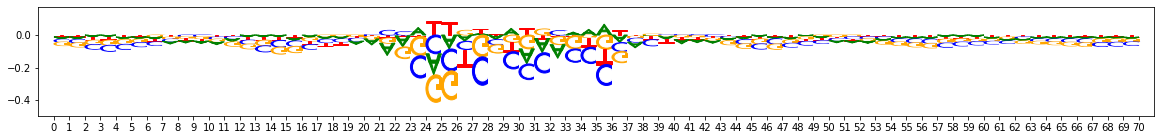

Task 0 actual importance scores:


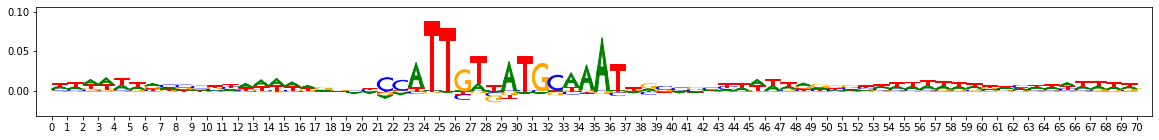

onehot, fwd and rev:


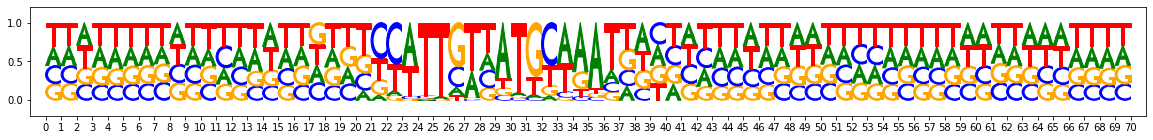

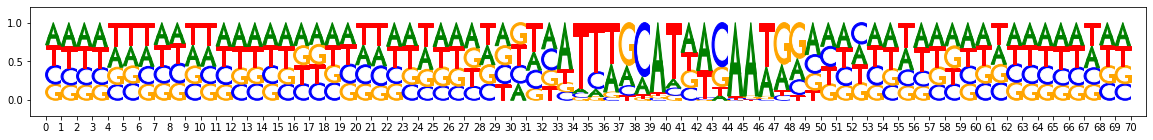

metacluster_0 pattern_1
total seqlets: 2382
Task 0 hypothetical scores:


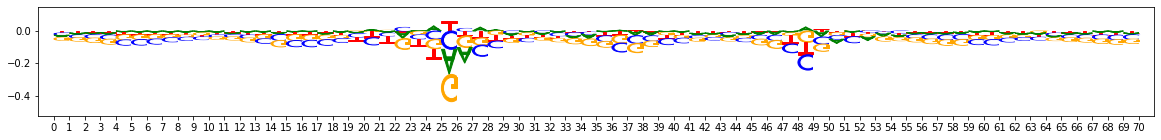

Task 0 actual importance scores:


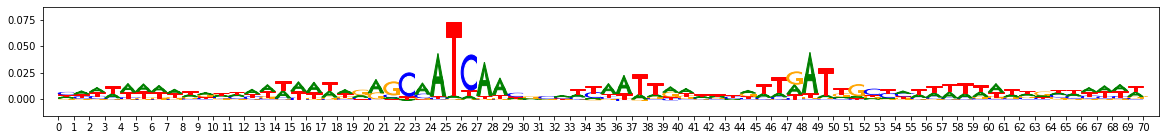

onehot, fwd and rev:


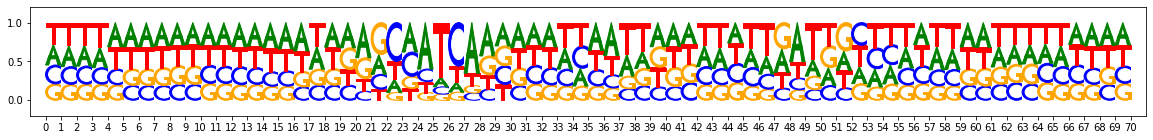

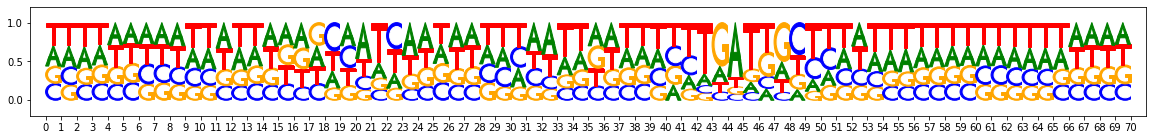

metacluster_0 pattern_2
total seqlets: 1579
Task 0 hypothetical scores:


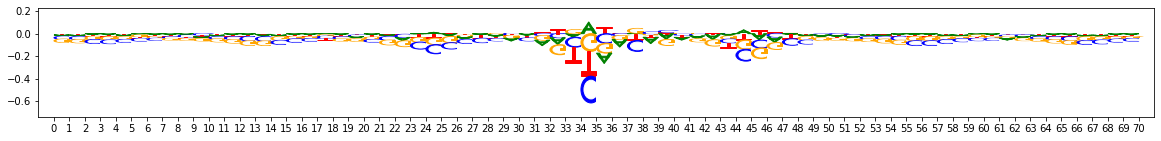

Task 0 actual importance scores:


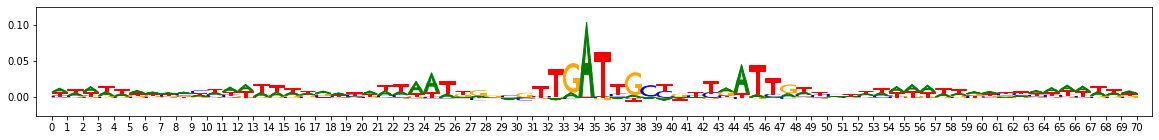

onehot, fwd and rev:


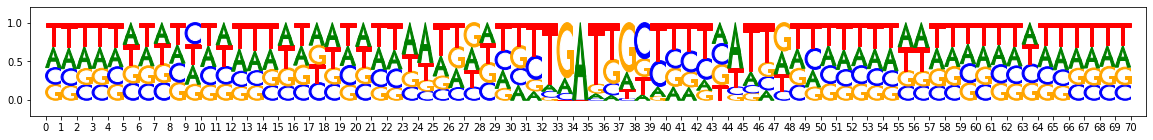

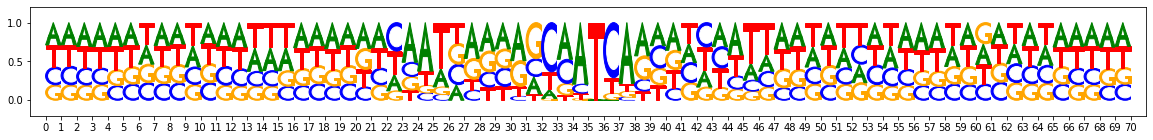

metacluster_0 pattern_3
total seqlets: 1546
Task 0 hypothetical scores:


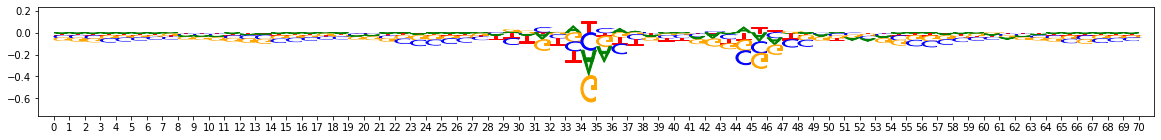

Task 0 actual importance scores:


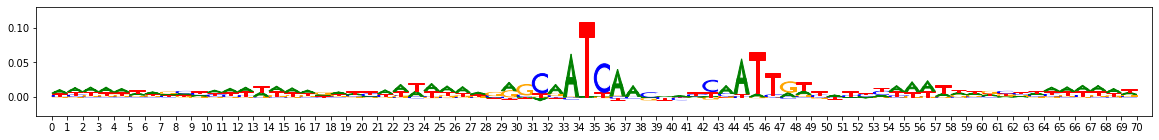

onehot, fwd and rev:


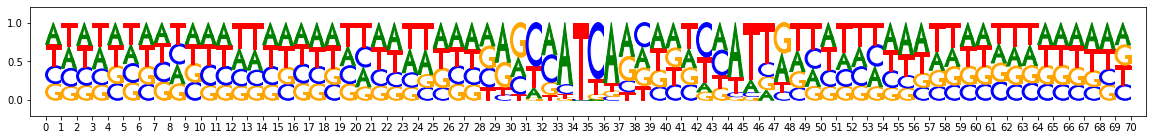

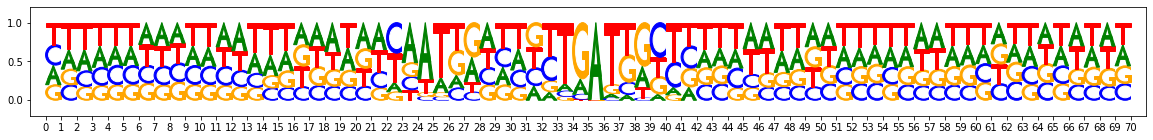

metacluster_0 pattern_4
total seqlets: 1427
Task 0 hypothetical scores:


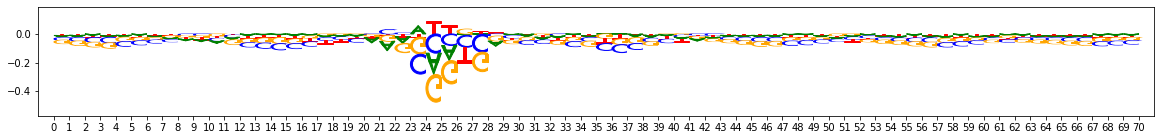

Task 0 actual importance scores:


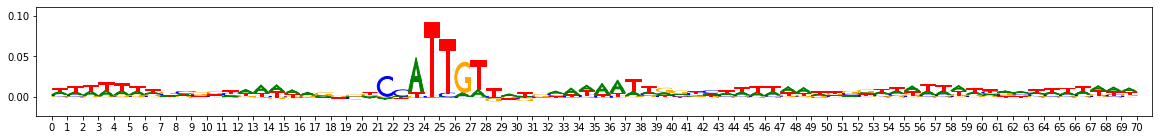

onehot, fwd and rev:


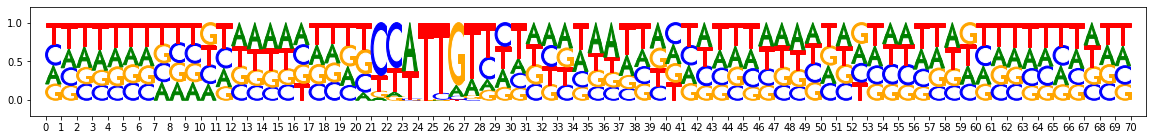

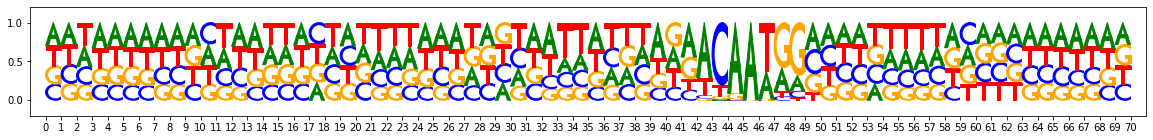

metacluster_0 pattern_5
total seqlets: 1211
Task 0 hypothetical scores:


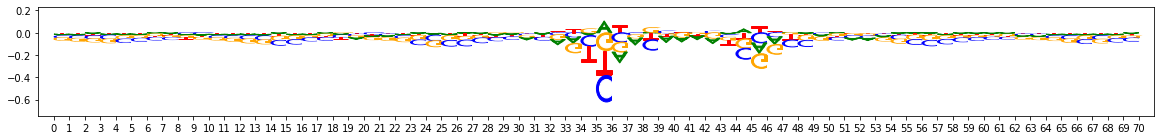

Task 0 actual importance scores:


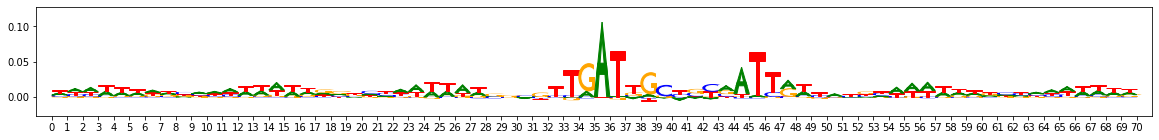

onehot, fwd and rev:


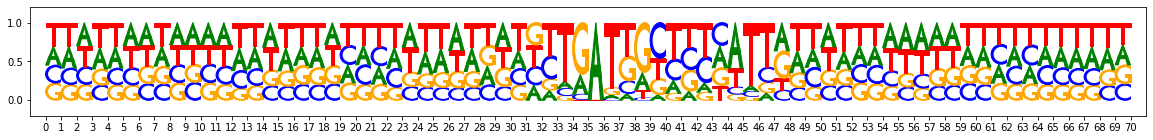

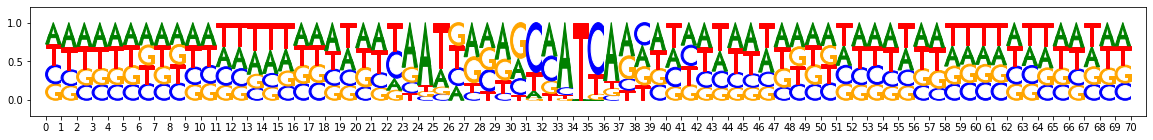

metacluster_0 pattern_6
total seqlets: 905
Task 0 hypothetical scores:


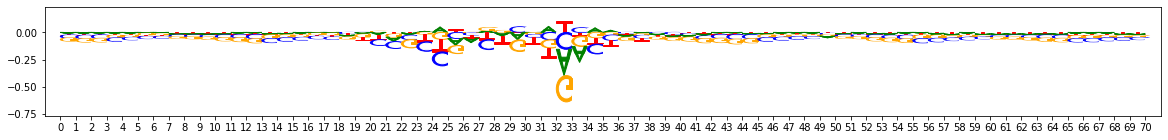

Task 0 actual importance scores:


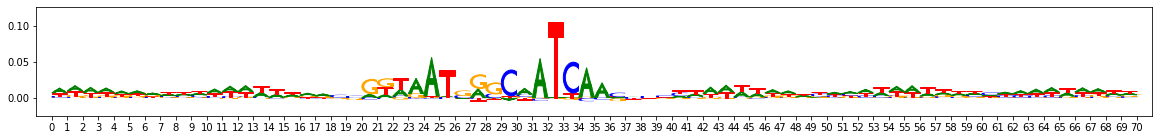

onehot, fwd and rev:


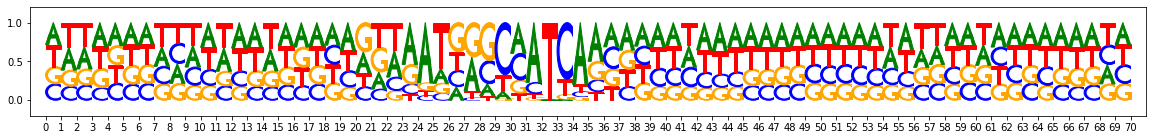

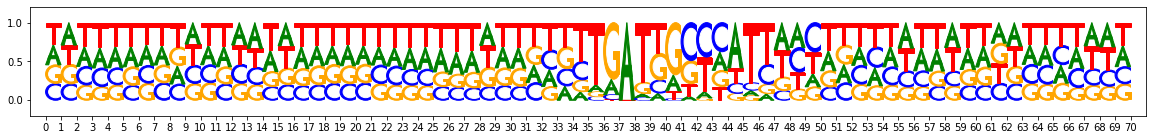

metacluster_0 pattern_7
total seqlets: 562
Task 0 hypothetical scores:


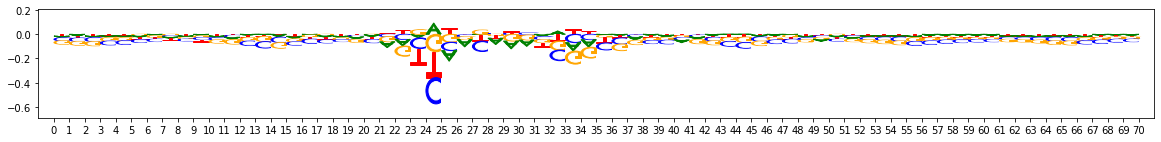

Task 0 actual importance scores:


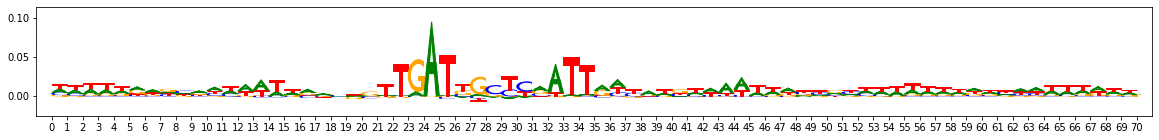

onehot, fwd and rev:


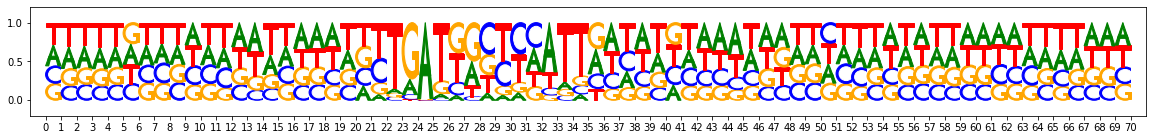

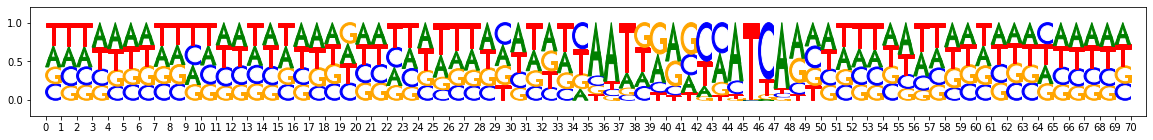

metacluster_0 pattern_8
total seqlets: 448
Task 0 hypothetical scores:


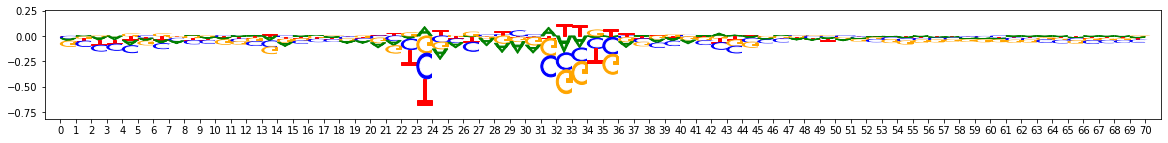

Task 0 actual importance scores:


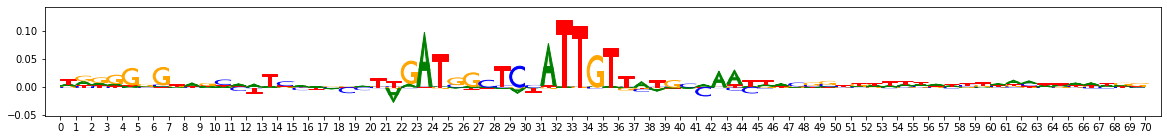

onehot, fwd and rev:


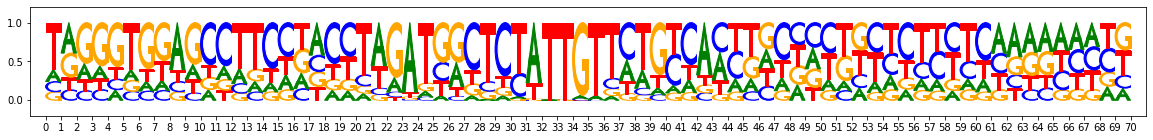

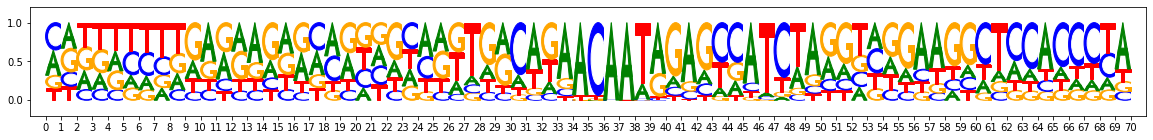

metacluster_0 pattern_9
total seqlets: 325
Task 0 hypothetical scores:


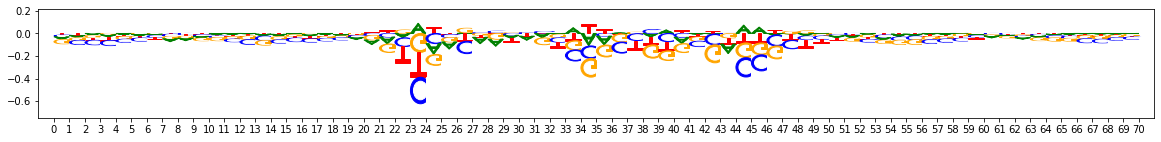

Task 0 actual importance scores:


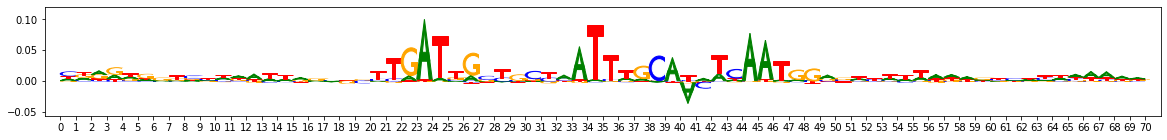

onehot, fwd and rev:


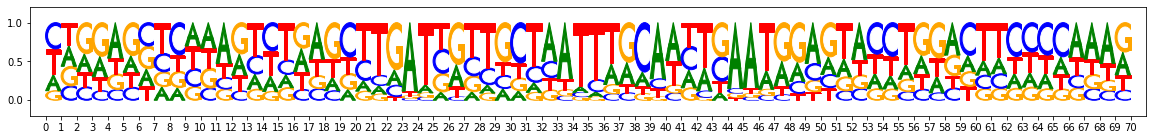

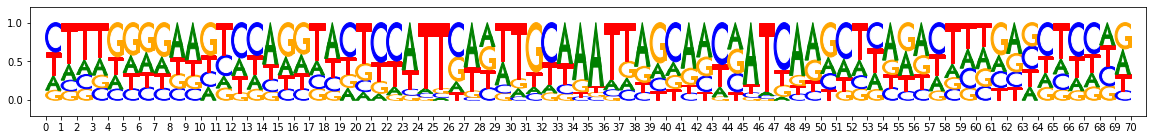

metacluster_0 pattern_10
total seqlets: 109
Task 0 hypothetical scores:


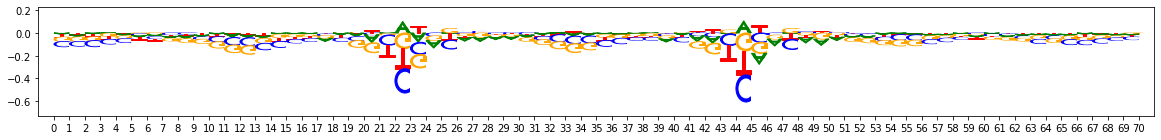

Task 0 actual importance scores:


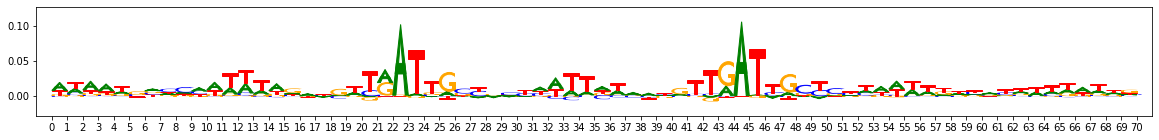

onehot, fwd and rev:


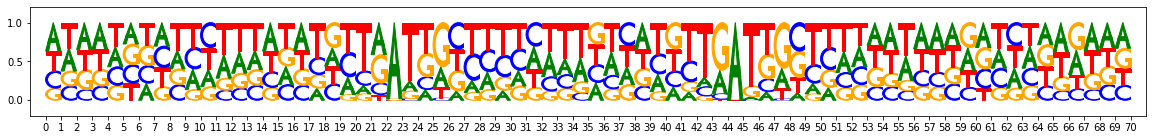

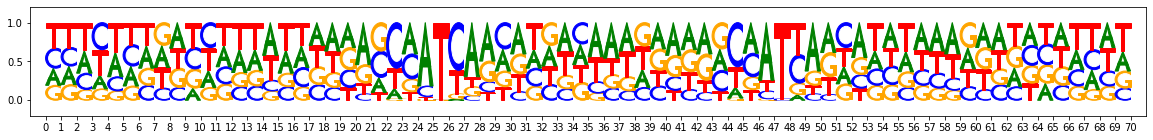

metacluster_0 pattern_11
total seqlets: 120
Task 0 hypothetical scores:


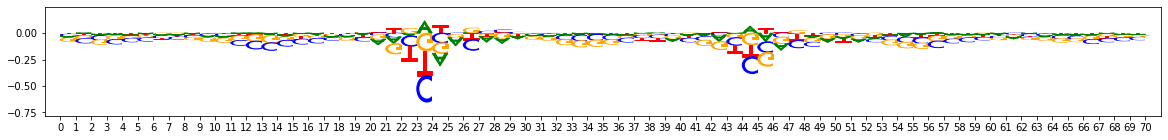

Task 0 actual importance scores:


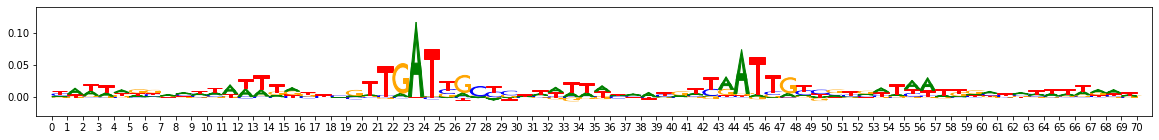

onehot, fwd and rev:


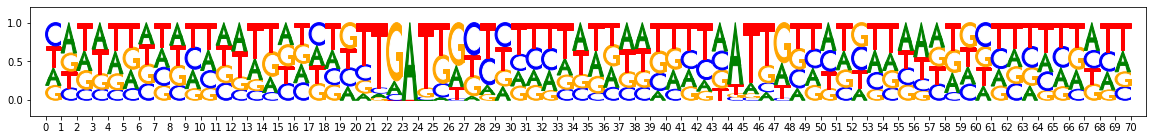

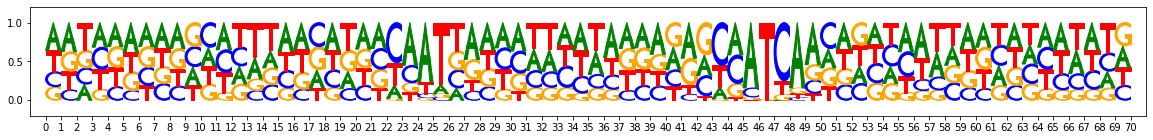

metacluster_0 pattern_12
total seqlets: 80
Task 0 hypothetical scores:


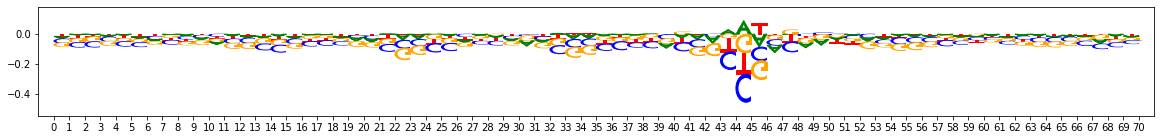

Task 0 actual importance scores:


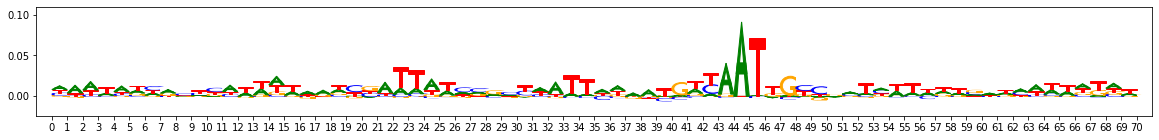

onehot, fwd and rev:


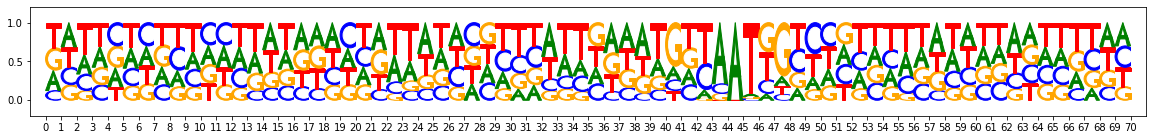

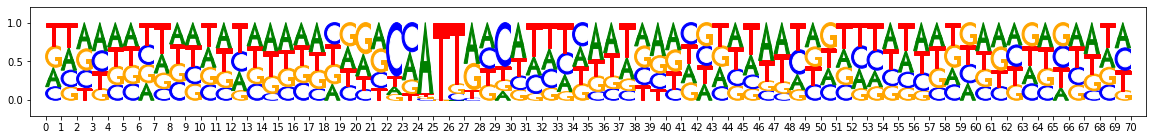

In [14]:
from modisco.visualization import viz_sequence
%matplotlib inline

hdf5_results = h5py.File(file_path,"r")

metacluster_names = [
    x.decode("utf-8") for x in 
    list(hdf5_results["metaclustering_results"]
         ["all_metacluster_names"][:])]

all_patterns = []
background = np.array([0.27, 0.23, 0.23, 0.27])

for metacluster_name in metacluster_names:
    print(metacluster_name)
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    print("activity pattern:",metacluster_grp["activity_pattern"][:])
    all_pattern_names = [x.decode("utf-8") for x in 
                         list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:])]
    if (len(all_pattern_names)==0):
        print("No motifs found for this activity pattern")
    for pattern_name in all_pattern_names:
        print(metacluster_name, pattern_name)
        all_patterns.append((metacluster_name, pattern_name))
        pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
        print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
        print("Task 0 hypothetical scores:")
        viz_sequence.plot_weights(pattern["Nanog_profile_wn_hypothetical_contribs"]["fwd"])
        print("Task 0 actual importance scores:")
        viz_sequence.plot_weights(pattern["Nanog_profile_wn_contrib_scores"]["fwd"])
        print("onehot, fwd and rev:")
        viz_sequence.plot_weights(np.array(pattern["sequence"]["fwd"])) 
        viz_sequence.plot_weights(np.array(pattern["sequence"]["rev"])) 
        
hdf5_results.close()